In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

In [8]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


Part 1 - Data Cleaning and Preprocessing 
This part involves performing data wrangling steps on the dataset. This may include removing nulls or replacing missing values, deleting unwanted columns and generally preparing our data into a more usable form for our analysis and model.

In [10]:
df = pd.read_csv("stroke.csv")
df.head() #reading our data file

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
df.describe() # random look at our five (5) points summary of all numerical column of our dataset

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
df.columns #checking all the columns present in our dataset

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Dropping a column: The ID column isn't useful in developing our model. Let's get rid of it.

In [14]:
df.drop('id', axis = 1, inplace = True)

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
df[df.duplicated()] # checking if we have duplicated rows in the data. Currently there are no duplicated values in our dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [16]:
# Let's check our dataframe's information. The goal here is to check our data types and if there are missing or null values in the data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [17]:
# The code below shows how many null values we have for each column
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Dealing With Missing Values

In [20]:
# First step, we will replace the missing value" " with nan. Note that np is numpy and can be added before the text you wish to change.

df.replace(' ', np.nan, inplace = True)

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [21]:
# To see the rows where BMI is Null Value

df[df['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [22]:
# Second step, we will calculate the mean of the BMI column having missing values. We will then fill the rows with missing values with the mean.

# Calculate the mean of the 'bmi' column, ignoring NaN values
mean_bmi = df['bmi'].mean()

mean_bmi

28.893236911794666

In [23]:
# Third Step, fill the missing rows in the BMI column with the calculated mean.

df['bmi'].fillna(mean_bmi, inplace=True)

print(df['bmi'])

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64


C:\Users\Kehinde\AppData\Local\Temp\ipykernel_21120\3288072207.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(mean_bmi, inplace=True)


In [24]:
# Now let's look at our data to check if the missing values have all been replaced by our mean.
df.head(40)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


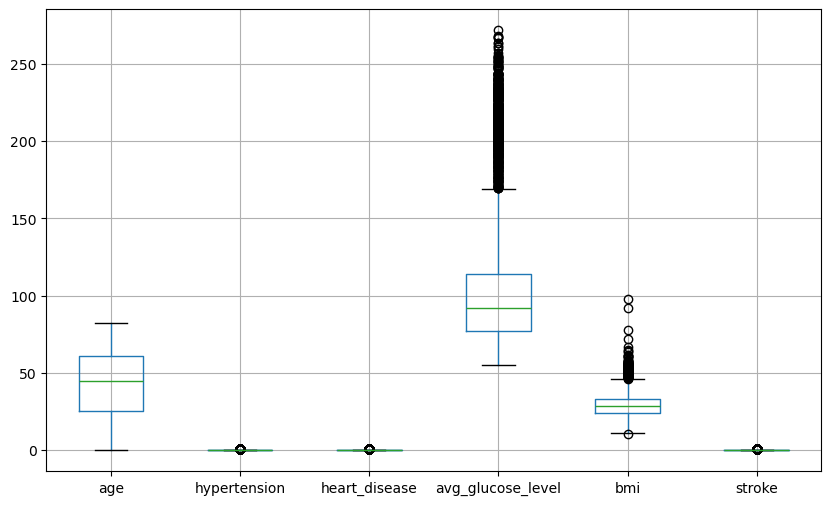

In [25]:
# This is a plot of our columns especially those with some outliers.
plt.figure(figsize=(10, 6))  
df.boxplot()
plt.show()

In [26]:
# Calculating our Interquartile and Finding/displaying the Outliers for all numerical columns 1 - 6. All Features

for label in ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']:

    q3, q1 = np.percentile(df[label], [75 ,25])
    iqr = q3 - q1
    lower_lim = q1 - 1.5*iqr
    upper_lim = q3 + 1.5*iqr
    df[label] = df[label].mask((df[label]<lower_lim)|(df[label]>upper_lim), np.nan)
    

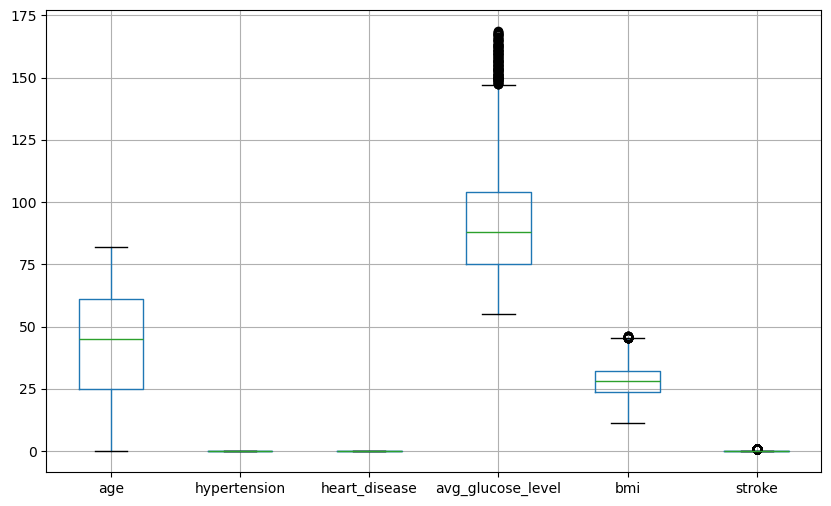

In [27]:
plt.figure(figsize=(10, 6))  
df.boxplot()
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       4612 non-null   float64
 3   heart_disease      4834 non-null   float64
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  4483 non-null   float64
 8   bmi                4984 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 439.3+ KB


In [29]:
# Now, we know there are some nan (null values) from our outliers. We will remove the null (nan) values and also reset our column index.

df.dropna(inplace = True)
df.reset_index(inplace = True, drop = True)

In [30]:
# Now, let's see if we have successfully removed the null values (nan).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926 entries, 0 to 3925
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3926 non-null   object 
 1   age                3926 non-null   float64
 2   hypertension       3926 non-null   float64
 3   heart_disease      3926 non-null   float64
 4   ever_married       3926 non-null   object 
 5   work_type          3926 non-null   object 
 6   Residence_type     3926 non-null   object 
 7   avg_glucose_level  3926 non-null   float64
 8   bmi                3926 non-null   float64
 9   smoking_status     3926 non-null   object 
 10  stroke             3926 non-null   int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 337.5+ KB


In [31]:
X = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]

# Compute the correlation matrix
correlation_matrix = X.corr()

# Display the correlation matrix
X.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,NaN,NaN,-0.028007,0.395662,0.207636
hypertension,NaN,NaN,NaN,NaN,NaN,NaN
heart_disease,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,-0.028007,NaN,NaN,1.000000,-0.005724,0.008281
bmi,0.395662,NaN,NaN,-0.005724,1.000000,0.037414
stroke,0.207636,NaN,NaN,0.008281,0.037414,1.000000


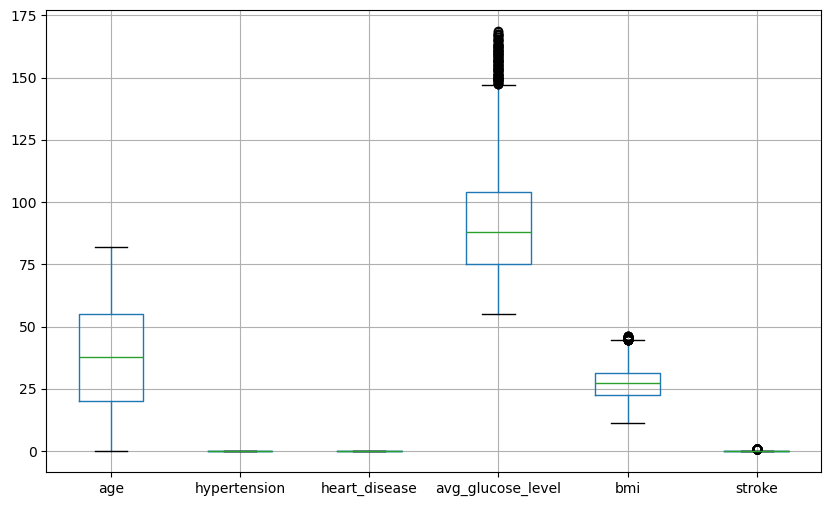

In [32]:
# Now, let's plot our box plot again to see the new look.
plt.figure(figsize=(10, 6))  
df.boxplot()
plt.show()

PART 2: Exploratory Data Analysis.
We will perform a thorough review of our columns, find their correlations and deep dive into our dataset for a solid grasp and understanding

Section A- Univariate Analysis: Comparing 'gender' (categorical) and 'bmi' (numeric).

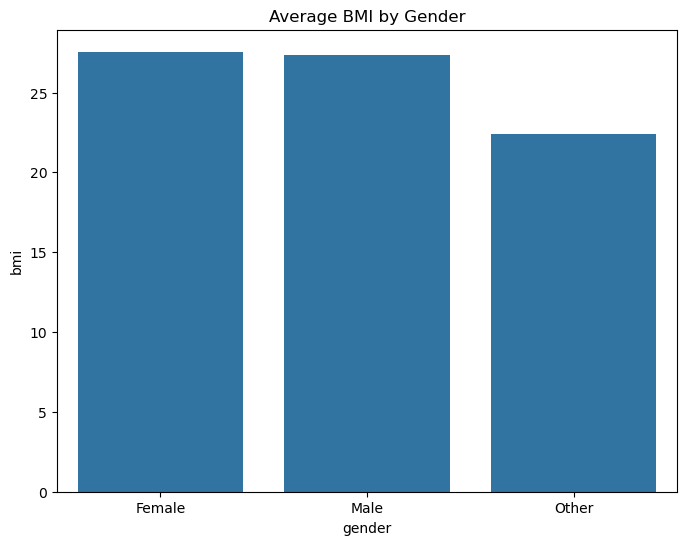

In [35]:
#Let's plot our barchat
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='bmi', data=df, errorbar=None)  # errorbar=None removes error bars
plt.title('Average BMI by Gender')
plt.show()

Section B- Bivariate analysis: Compare 'smoking_status' (categorical) with 'avg_glucose_level' and 'bmi' which are both numerical.

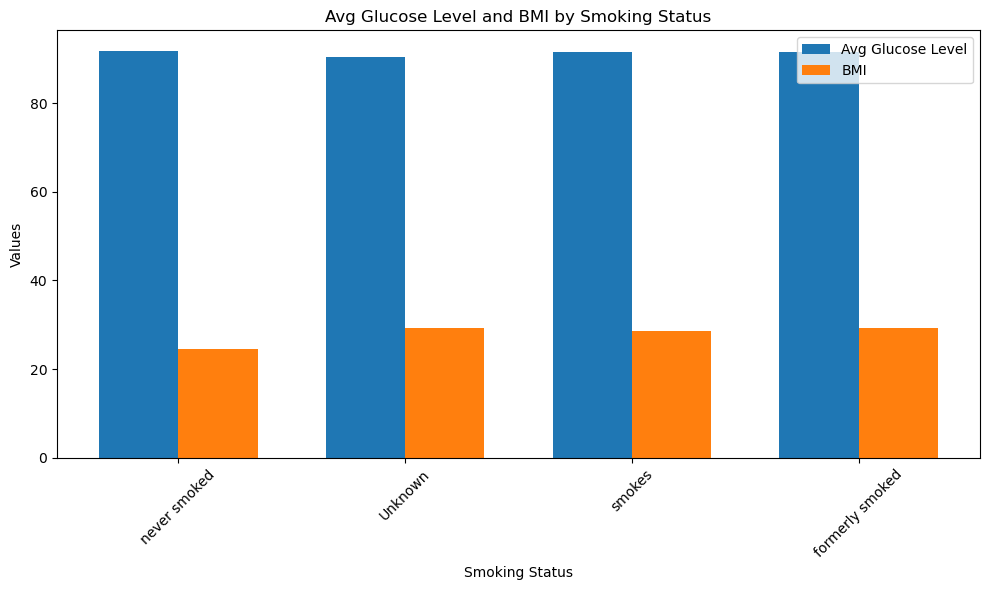

In [37]:
# Create figure and axis
plt.figure(figsize=(10, 6))

# Create bar width
bar_width = 0.35
index = np.arange(len(df['smoking_status'].unique()))  # Unique categories in smoking_status

# Bar plot for 'avg_glucose_level'
plt.bar(index, df.groupby('smoking_status')['avg_glucose_level'].mean(), bar_width, label='Avg Glucose Level')

# Bar plot for 'bmi' next to 'avg_glucose_level'
plt.bar(index + bar_width, df.groupby('smoking_status')['bmi'].mean(), bar_width, label='BMI')

# Set titles and labels
plt.xlabel('Smoking Status')
plt.ylabel('Values')
plt.title('Avg Glucose Level and BMI by Smoking Status')
plt.xticks(index + bar_width / 2, df['smoking_status'].unique(), rotation=45)  # Set xticks
plt.legend()

plt.tight_layout()
plt.show()


Section C- Multivariate Analysis: Compare smoking_status and residence_type with both avg_glucose_level and bmi

<Figure size 1000x600 with 0 Axes>

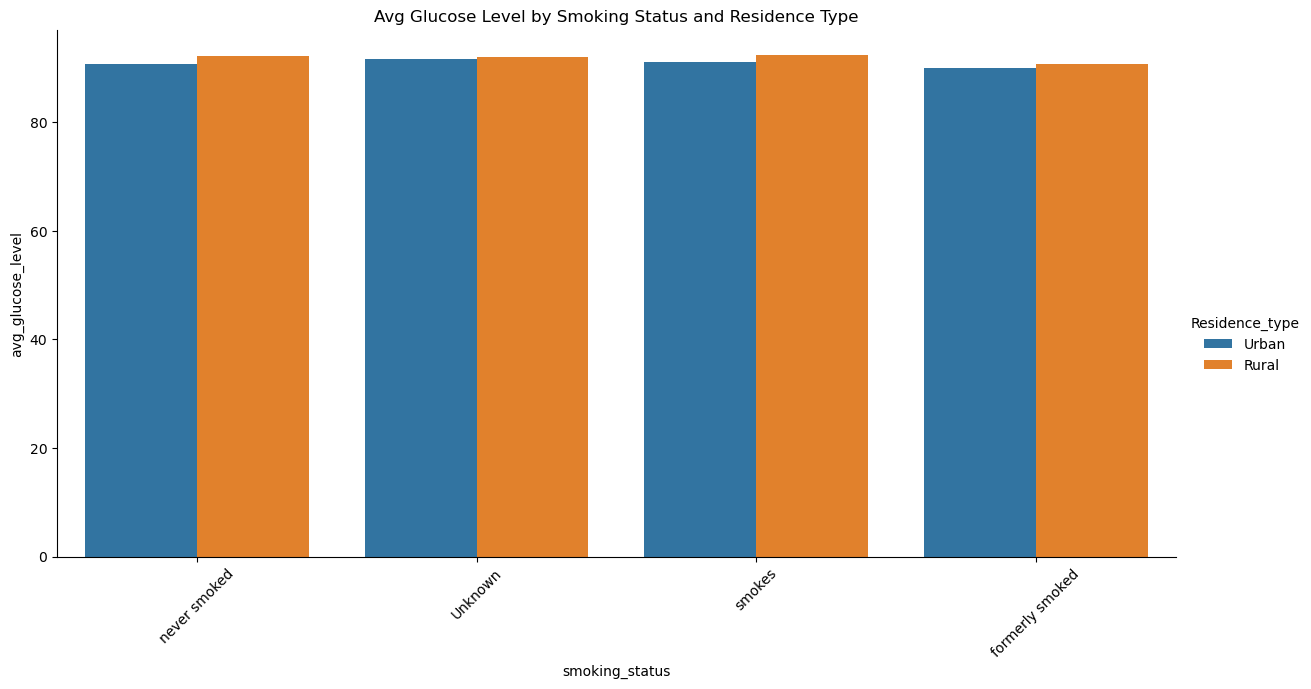

<Figure size 1000x600 with 0 Axes>

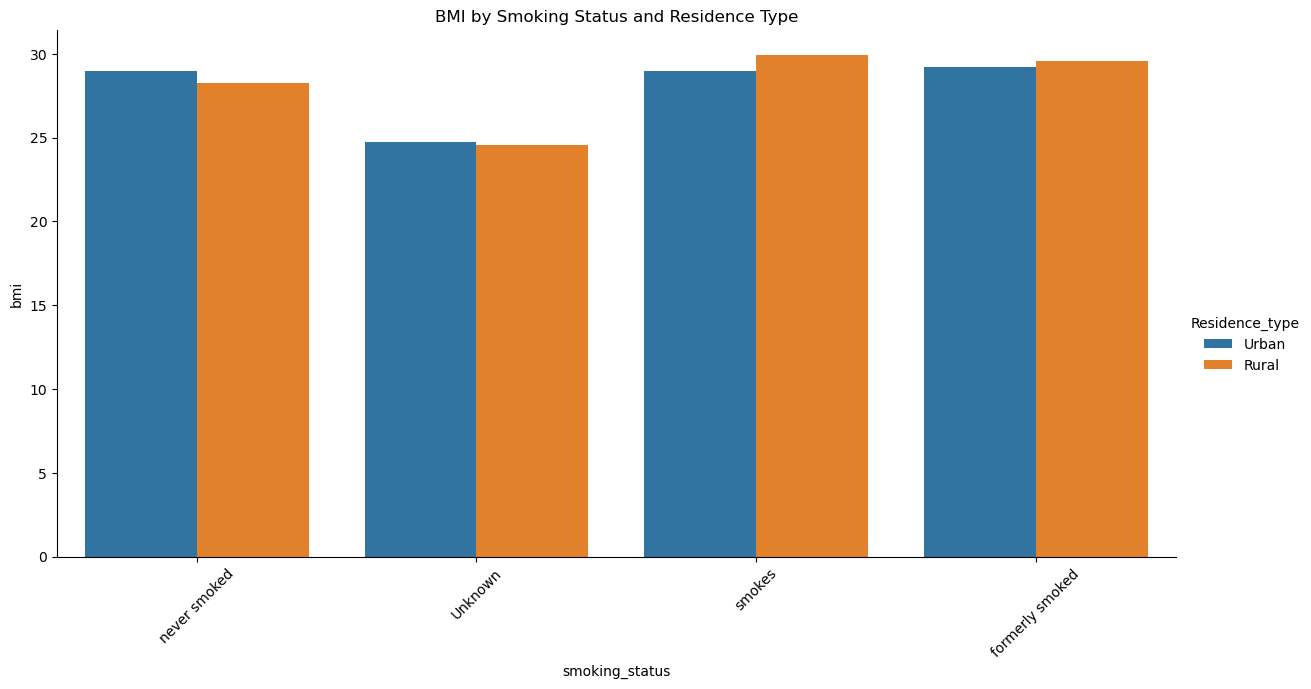

In [39]:
# Plot for avg_glucose_level comparison
plt.figure(figsize=(10, 6))
sns.catplot(x='smoking_status', y='avg_glucose_level', hue='Residence_type', kind='bar', data=df, height=6, aspect=2, errorbar=None)
plt.title('Avg Glucose Level by Smoking Status and Residence Type')
plt.xticks(rotation=45)
plt.show()

# Plot for bmi comparison
plt.figure(figsize=(10, 6))
sns.catplot(x='smoking_status', y='bmi', hue='Residence_type', kind='bar', data=df, height=6, aspect=2, errorbar=None)
plt.title('BMI by Smoking Status and Residence Type')
plt.xticks(rotation=45)
plt.show()

Checking for a correlation between two of features of my dataset: "bmi" and "average glucose level"

PART 3: SAMPLING 
currently, the distribution of our target column stroke (1 & 0) is not fairly distributed. We need to apply sampling to ensure the model's training is not biased

Using RandomOverSampler to Oversample the Minority Class (stroke = 1)

In [43]:
# 'df' is our DataFrame and 'stroke' is our target column
X = df.drop('stroke', axis=1)  # All Features will remain (except for the 'stroke' column)
y = df['stroke']               # Target column ('stroke')

# Defining the oversampling
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Putting resampled arrays back into DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['stroke'])], axis=1)

# Checking the new distribution of target column
print("Original target distribution:")
print(df['stroke'].value_counts())
print("\nResampled target distribution:")
print(df_resampled['stroke'].value_counts())


Original target distribution:
stroke
0    3814
1     112
Name: count, dtype: int64

Resampled target distribution:
stroke
1    3814
0    3814
Name: count, dtype: int64


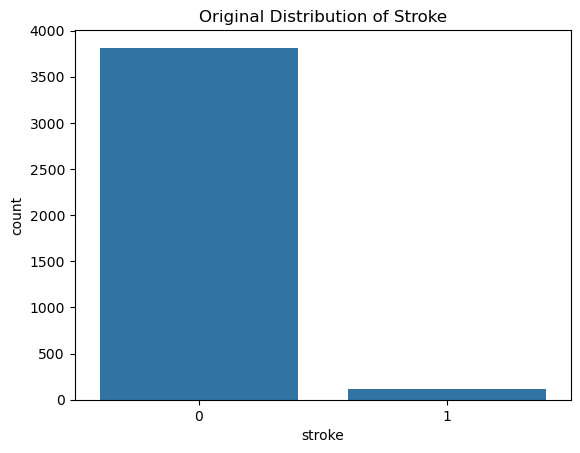

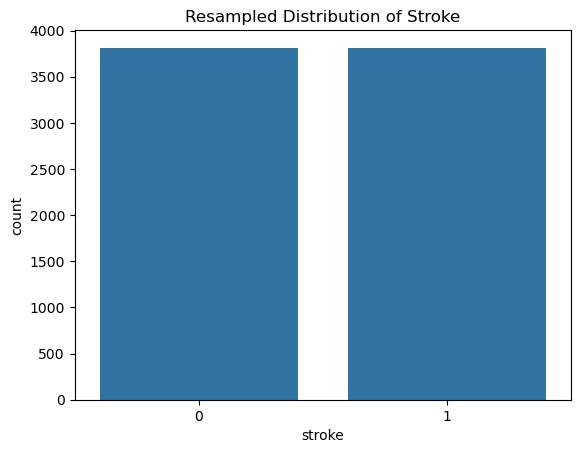

In [44]:
# Let's Visualize our original target distribution
sns.countplot(x=df['stroke'])
plt.title('Original Distribution of Stroke')
plt.show()

# Let's Visualize our resampled target distribution
sns.countplot(x=df_resampled['stroke'])
plt.title('Resampled Distribution of Stroke')
plt.show()

PART 4: BUILD OUR MODEL

Model Type - Logistic Regression
We are using all independent features of our data to train and predict our target (stroke). 

In [47]:
# Define the feature columns and target. Here we are using our resampled dataset.

X = df_resampled[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = df_resampled[['stroke']]

# We are One-hot encoding categorical columns and also fitting Logistic Regression in a pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(drop='first'), ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
    ], remainder='passthrough')),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Split resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the model and make predictions
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77       766
           1       0.77      0.79      0.78       760

    accuracy                           0.78      1526
   macro avg       0.78      0.78      0.78      1526
weighted avg       0.78      0.78      0.78      1526



Viewing and plotting our Confusion Matrix

In [49]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[586 180]
 [162 598]]


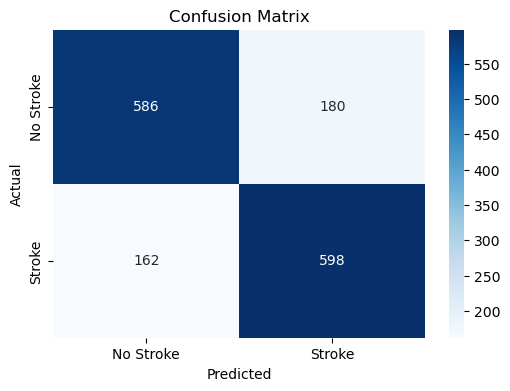

In [50]:
# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

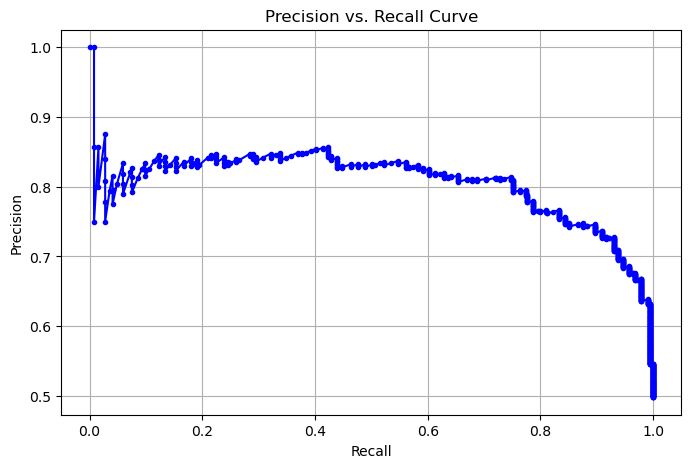

In [93]:
# Calculate precision and recall values for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, pipeline.predict_proba(X_test)[:, 1])

# Plotting the Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.', color='blue')
plt.title('Precision vs. Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()